In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
import matplotlib as mpl
import seaborn as sns

# 1.1 Set a clean, modern seaborn theme
sns.set_theme(style="whitegrid", context="talk", font="sans-serif")

# 1.2 Define a custom color palette (colorblind‐friendly)
custom_palette = sns.color_palette("tab10")  # or "colorblind", "viridis", etc.
sns.set_palette(custom_palette)

# 1.3 Tweak matplotlib defaults
mpl.rcParams.update({
    # Figure
    "figure.figsize": (8, 5),
    "figure.dpi": 100,
    # Font
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    # Lines & Markers
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Axes
    "axes.edgecolor": "#333333",
    "axes.linewidth": 1,
    "axes.spines.top": False,
    "axes.spines.right": False,
    # Grid
    "grid.color": "#dddddd",
    "grid.linestyle": "--",
    "grid.linewidth": 0.8,
    # Legend
    "legend.frameon": False
})


In [3]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


Missing Values

In [4]:
df.isnull().sum()[df.isnull().sum() > 0]

Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64

In [5]:
# Fill missing Teacher_Quality with the most common value (mode)
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)

# Fill missing Parental_Education_Level with 'Missing'
df['Parental_Education_Level'].fillna('Missing', inplace=True)

# Fill missing Distance_from_Home with 'Missing'
df['Distance_from_Home'].fillna('Missing', inplace=True)

Standardizing Categorical Values (capitalization,, whitespaces, etc)

In [6]:
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

Encoding Categorical Variables for Regression (Ordinal and Dummy Variables)

In [7]:
# Ordinal encoding: convert ordered categories into numeric values
ordinal_maps = {
    'Teacher_Quality': {'Low': 1, 'Medium': 2, 'High': 3},
    'Motivation_Level': {'Low': 1, 'Medium': 2, 'High': 3},
    'Parental_Involvement': {'Low': 1, 'Medium': 2, 'High': 3},
    'Access_to_Resources': {'Low': 1, 'Medium': 2, 'High': 3},
    'Parental_Education_Level': {'High School': 1, 'College': 2, 'Postgrad': 3, 'Missing': 0},
    'Distance_from_Home': {'Near': 1, 'Moderate': 2, 'Far': 3, 'Missing': 0}
}

for col, mapping in ordinal_maps.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# Dummy variable encoding: create binary columns for unordered categories
nominal_cols = ['Internet_Access', 'Extracurricular_Activities', 'Family_Income',
                'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Gender']

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [8]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Physical_Activity,...,Exam_Score,Internet_Access_Yes,Extracurricular_Activities_Yes,Family_Income_Low,Family_Income_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male
0,23,84,1,3,7,73,1,0,2,3,...,67,1,0,1,0,1,0,1,0,1
1,19,64,1,2,8,59,1,2,2,4,...,61,1,0,0,1,1,0,0,0,0
2,24,98,2,2,7,91,2,2,2,4,...,74,1,1,0,1,1,1,0,0,1
3,29,89,1,2,8,98,2,1,2,4,...,71,1,1,0,1,1,0,0,0,1
4,19,92,2,2,6,65,2,3,3,4,...,70,1,1,0,1,1,1,0,0,0


In [9]:
# Display basic information
df_info = df.info()
df_description = df.describe(include='all')

df_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hours_Studied                   6607 non-null   int64  
 1   Attendance                      6607 non-null   int64  
 2   Parental_Involvement            6607 non-null   int64  
 3   Access_to_Resources             6607 non-null   int64  
 4   Sleep_Hours                     6607 non-null   int64  
 5   Previous_Scores                 6607 non-null   int64  
 6   Motivation_Level                6607 non-null   int64  
 7   Tutoring_Sessions               6607 non-null   int64  
 8   Teacher_Quality                 6607 non-null   int64  
 9   Physical_Activity               6607 non-null   int64  
 10  Parental_Education_Level        5302 non-null   float64
 11  Distance_from_Home              6607 non-null   int64  
 12  Exam_Score                      66

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Physical_Activity,...,Exam_Score,Internet_Access_Yes,Extracurricular_Activities_Yes,Family_Income_Low,Family_Income_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,...,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,2.086423,2.100197,7.02906,75.070531,1.906463,1.493719,2.195247,2.967610,...,67.235659,0.924474,0.596035,0.404420,0.403511,0.695929,0.392311,0.399273,0.105191,0.577267
std,5.990594,11.547475,0.695521,0.698347,1.46812,14.399784,0.695798,1.230570,0.596707,1.031231,...,3.890456,0.264258,0.490728,0.490817,0.490639,0.460048,0.488302,0.489786,0.306823,0.494031
min,1.000000,60.000000,1.000000,1.000000,4.00000,50.000000,1.000000,0.000000,1.000000,0.000000,...,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,2.000000,2.000000,6.00000,63.000000,1.000000,1.000000,2.000000,2.000000,...,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,80.000000,2.000000,2.000000,7.00000,75.000000,2.000000,1.000000,2.000000,3.000000,...,67.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,24.000000,90.000000,3.000000,3.000000,8.00000,88.000000,2.000000,2.000000,3.000000,4.000000,...,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,44.000000,100.000000,3.000000,3.000000,10.00000,100.000000,3.000000,8.000000,3.000000,6.000000,...,101.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


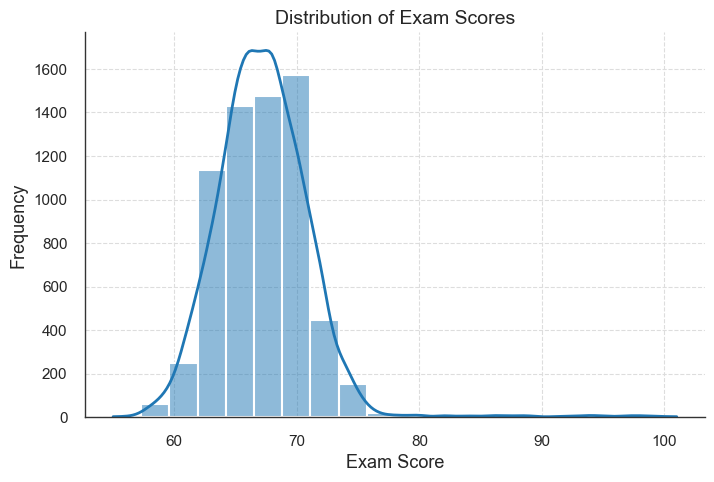

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

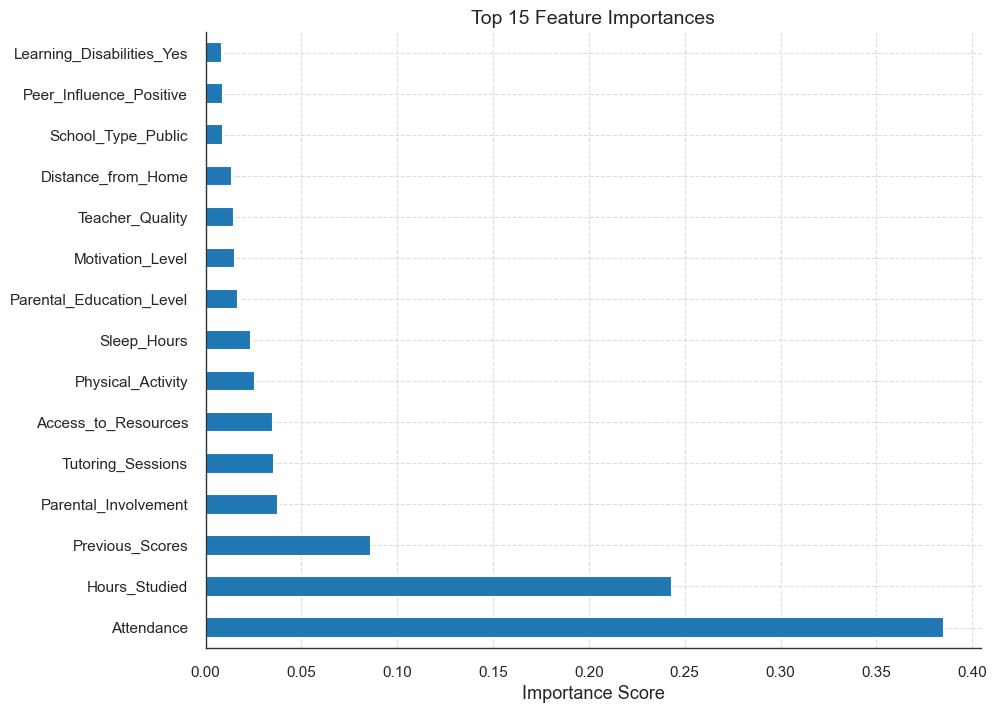

In [11]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', figsize=(10, 8))
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

In [12]:
group_stats = df.groupby('Teacher_Quality')['Exam_Score'].describe()
display(group_stats)

,count,mean,std,min,25%,50%,75%,max
Teacher_Quality,,,,,,,,
1,657.0,66.753425,3.872207,58.0,64.0,67.0,69.0,94.0
2,4003.0,67.100175,3.831627,55.0,65.0,67.0,69.0,100.0
3,1947.0,67.676939,3.977700,58.0,65.0,68.0,70.0,101.0


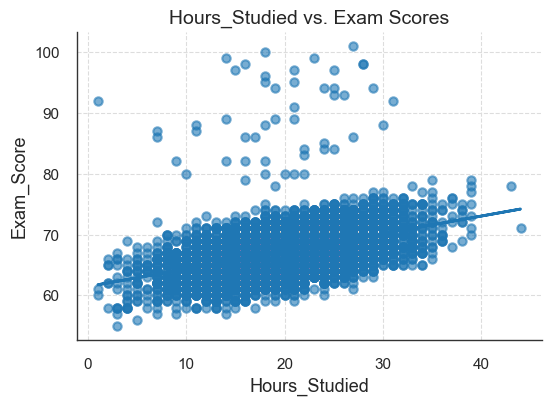

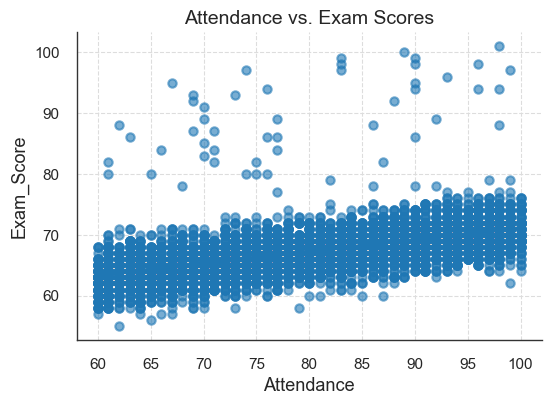

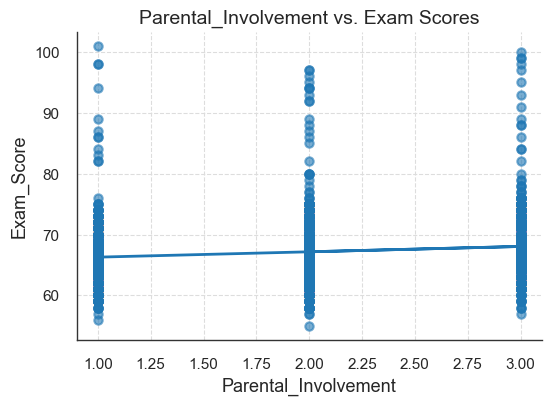

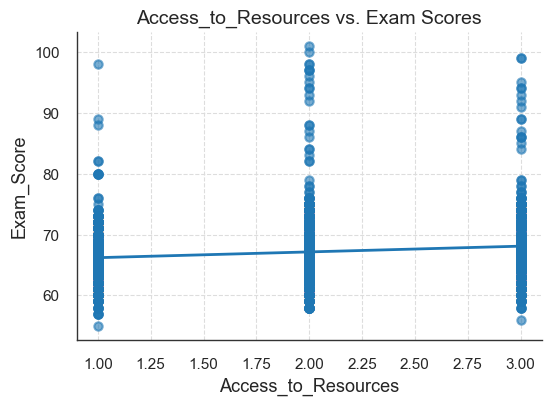

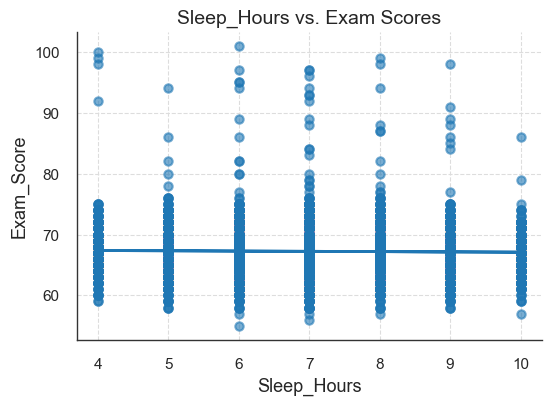

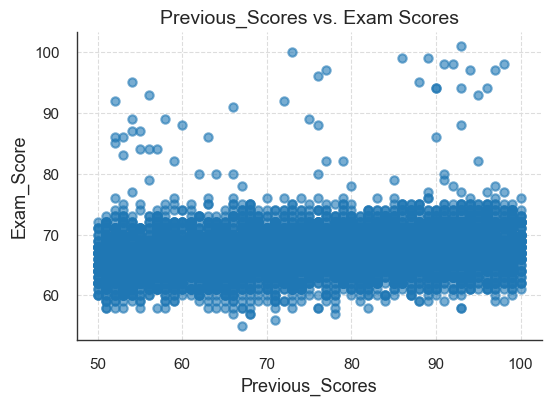

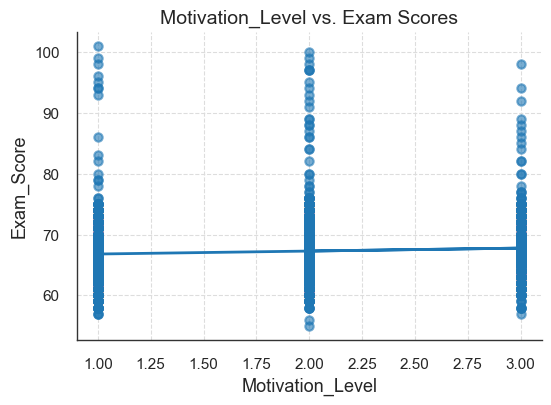

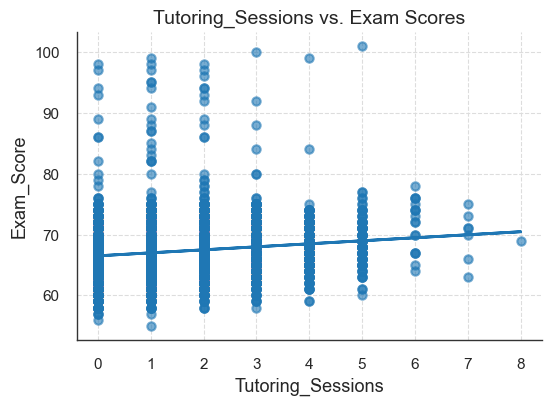

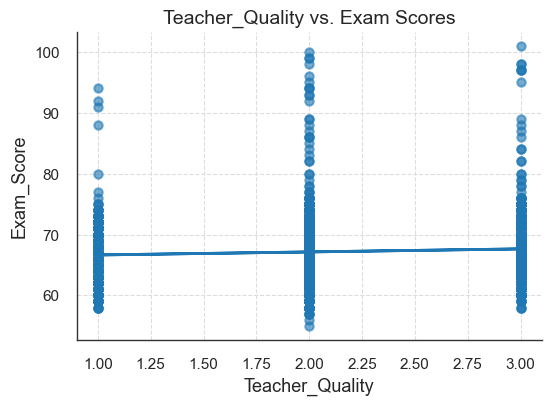

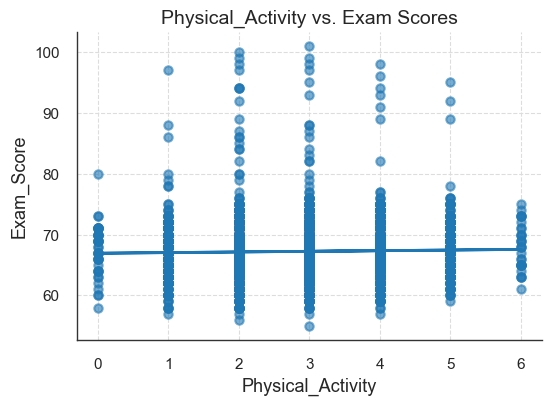

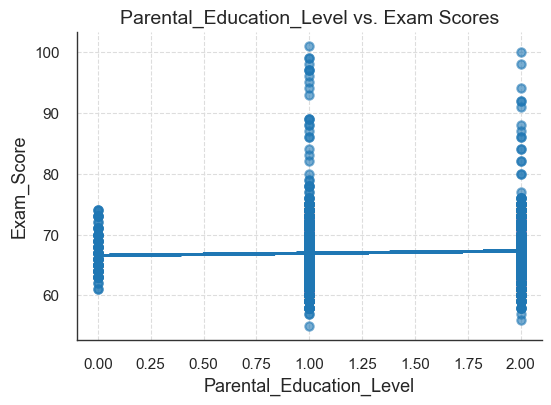

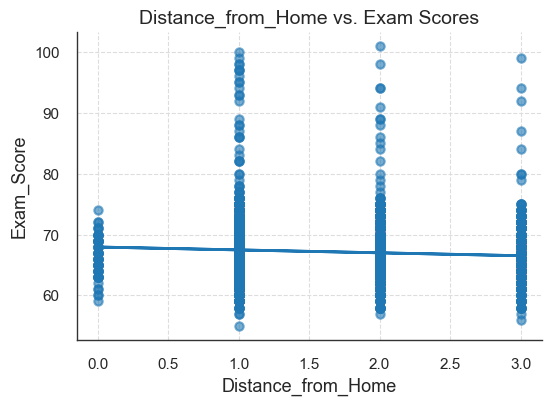

In [13]:

import matplotlib.pyplot as plt
import numpy as np

numeric_cols=['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions', 'Teacher_Quality', 'Physical_Activity', 'Parental_Education_Level', 'Distance_from_Home']

for col in numeric_cols:
    if col == 'Exam_Score': 
        continue

    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df['Exam_Score'], alpha=0.6)
    # add a simple least-squares line
    m, b = np.polyfit(df[col].dropna(), df['Exam_Score'].loc[df[col].dropna().index], 1)
    plt.plot(df[col], m*df[col] + b, linewidth=2)
    plt.xlabel(col)
    plt.ylabel('Exam_Score')
    plt.title(f'{col} vs. Exam Scores')
    plt.show()

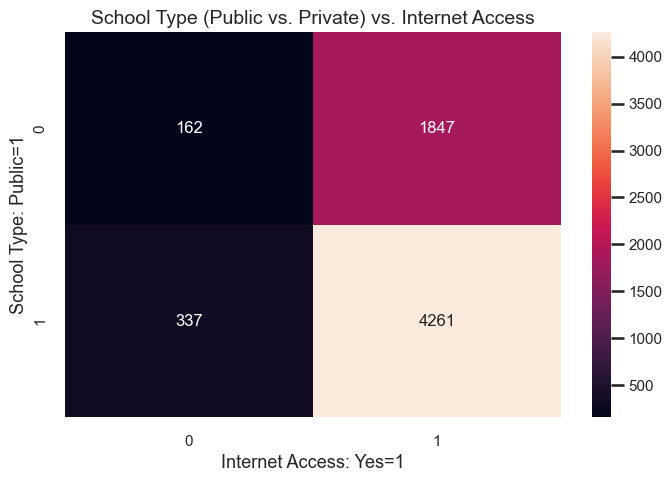

In [14]:
# Pivot table of counts: School_Type × Internet_Access (assuming both encoded as dummies)
ct = pd.crosstab(df['School_Type_Public'], df['Internet_Access_Yes'])
sns.heatmap(ct, annot=True, fmt='d')
plt.title('School Type (Public vs. Private) vs. Internet Access')
plt.xlabel('Internet Access: Yes=1')
plt.ylabel('School Type: Public=1')
plt.show()

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X = df.drop(columns=['Exam_Score'])  
y = df['Exam_Score']             

X = X.fillna(X.mean(numeric_only=True))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
lasso_cv = LassoCV(alphas=np.logspace(-2, 2, 100), cv=5, max_iter=10000)
lasso_cv.fit(X_scaled, y)
optimal_alpha = lasso_cv.alpha_
print(f"Optimal alpha: {optimal_alpha:.4f}")

lasso_final = LassoCV(alphas=[optimal_alpha], cv=5, max_iter=10000)
lasso_final.fit(X_scaled, y)

coef_mask = lasso_final.coef_ != 0
selected_features = X.columns[coef_mask].tolist()
print("Selected features after Lasso:", selected_features)

Optimal alpha: 0.0100
Selected features after Lasso: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions', 'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home', 'Internet_Access_Yes', 'Extracurricular_Activities_Yes', 'Family_Income_Low', 'Family_Income_Medium', 'Peer_Influence_Neutral', 'Peer_Influence_Positive', 'Learning_Disabilities_Yes', 'Gender_Male']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have v

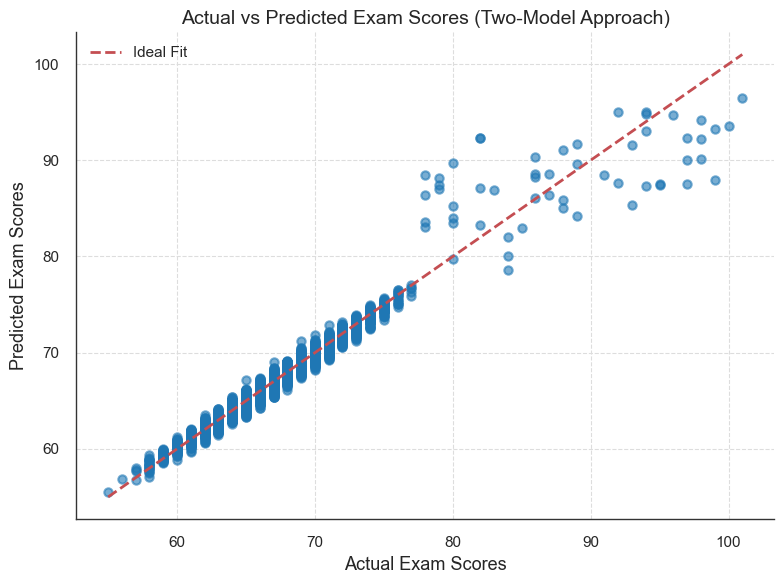

Combined R-squared: 0.9642
R² Low Scores (≤ 80): 0.9748
R² High Scores (> 80): 0.3532


In [42]:
X_selected = X[selected_features]

threshold = 77
low_mask = y <= threshold
high_mask = y > threshold

X_low = X_selected[low_mask]
y_low = y[low_mask]
X_high = X_selected[high_mask]
y_high = y[high_mask]

scaler_low = StandardScaler()
X_low_scaled = scaler_low.fit_transform(X_low)

scaler_high = StandardScaler()
X_high_scaled = scaler_high.fit_transform(X_high)

model_low = LinearRegression()
model_low.fit(X_low_scaled, y_low)

model_high = LinearRegression()
model_high.fit(X_high_scaled, y_high)

y_pred_combined = []

for i in range(len(X_selected)):
    x = X_selected.iloc[i].values.reshape(1, -1)
    if y.iloc[i] > threshold:
        x_scaled = scaler_high.transform(x)
        pred = model_high.predict(x_scaled)[0]
    else:
        x_scaled = scaler_low.transform(x)
        pred = model_low.predict(x_scaled)[0]
    y_pred_combined.append(pred)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_combined, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores (Two-Model Approach)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

r2_total = r2_score(y, y_pred_combined)
print(f"Combined R-squared: {r2_total:.4f}")

r2_low = r2_score(y_low, model_low.predict(X_low_scaled))
r2_high = r2_score(y_high, model_high.predict(X_high_scaled))
print(f"R² Low Scores (≤ 80): {r2_low:.4f}")
print(f"R² High Scores (> 80): {r2_high:.4f}")

In [43]:
def print_equation(model, features, name="Model"):
    intercept = model.intercept_
    coefs = model.coef_
    equation = f"{name}:\nExam_Score = {intercept:.3f}"
    for feat, coef in zip(features, coefs):
        sign = " + " if coef >= 0 else " - "
        equation += f"{sign}{abs(coef):.3f}*{feat}"
    print(equation + "\n")

print_equation(model_low, selected_features, name="Low Score Model (≤ 80)")
print_equation(model_high, selected_features, name="High Score Model (> 80)")

Low Score Model (≤ 80):
Exam_Score = 67.059 + 1.782*Hours_Studied + 2.313*Attendance + 0.686*Parental_Involvement + 0.693*Access_to_Resources + 0.707*Previous_Scores + 0.348*Motivation_Level + 0.620*Tutoring_Sessions + 0.296*Teacher_Quality + 0.192*Parental_Education_Level - 0.325*Distance_from_Home + 0.266*Internet_Access_Yes + 0.245*Extracurricular_Activities_Yes - 0.472*Family_Income_Low - 0.222*Family_Income_Medium + 0.247*Peer_Influence_Neutral + 0.498*Peer_Influence_Positive - 0.305*Learning_Disabilities_Yes - 0.002*Gender_Male

High Score Model (> 80):
Exam_Score = 88.236 - 2.994*Hours_Studied + 2.539*Attendance - 0.358*Parental_Involvement + 0.673*Access_to_Resources + 1.569*Previous_Scores + 0.045*Motivation_Level - 0.378*Tutoring_Sessions - 1.278*Teacher_Quality - 0.132*Parental_Education_Level + 0.042*Distance_from_Home - 1.036*Internet_Access_Yes - 0.919*Extracurricular_Activities_Yes - 1.348*Family_Income_Low - 0.727*Family_Income_Medium + 0.582*Peer_Influence_Neutral + 1.